In [2]:
import pickle
import sys, importlib
import pandas as pd
import matplotlib.pyplot as plt

try :
    importlib.reload(sys.modules['posspy']) #Script permettant de réimporter une librarie qui vient d'être modifiée
except :
    import posspy
    
try :
    importlib.reload(sys.modules['fitpy']) #Script permettant de réimporter une librarie qui vient d'être modifiée
except :
    import fitpy as ft

slt gro


In [70]:
posspy.run_shot('Match_002', '1', 22, 44)

poss_nb_pass  poss_time_min_sec  poss_time_max_sec  \
poss_id                                                           
Team_06_232             6             1354.0             1365.0   

             poss_duree_sec  poss_freq_pass_sec  poss_dist_m  poss_vit_ms  
poss_id                                                                    
Team_06_232            11.0            1.833333    47.878165      4.35256

In [2]:
with open("train.pkl", "rb") as file:
    shots = pickle.load(file)
    
shots = shots.rename(columns = {"min":"minu"})

In [5]:
shots.head(2)

shot_id       player     team      match  ht  minu  sec  time_sec  \
0  001_1_1102  Player_0044  Team_01  Match_001   1    18   22      1102   
1  001_1_1231  Player_0029  Team_02  Match_001   1    20   31      1231   

       x          y  dist_to_gk  dist_to_goal  field_of_view  x_abs  \
0  11.72  15.726742   15.792308     19.613485      17.226091  11.72   
1  15.75  12.582551   12.937484     20.158946      13.190311  15.75   

   angle_to_y  nb_def_in_cone  closest_def   density   goal  
0   36.694491               1     1.021812  2.361822  False  
1   51.378918               0     0.606053  2.846259  False

# Tir avec features fitness

In [17]:
%%time
shots2 = shots.apply(lambda df : pd.concat([df, ft.run(df.match, df.player, (str(df.ht), df.minu, df.sec)).iloc[0]]), axis = 1)

NameError: ("name 'ft' is not defined", 'occurred at index 0')

In [8]:
shots2[shots2.match == 'Match_001'][shots2.goal == True]

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


shot_id       player     team      match  ht  minu  sec  time_sec  \
2   001_1_2066  Player_0088  Team_02  Match_001   1    34   26      2066   
5    001_1_563  Player_0060  Team_02  Match_001   1     9   23       563   
13  001_2_2584  Player_0085  Team_02  Match_001   2    88    4      2584   

       x          y  ...  acc_nb  acc_time_med  acc_time_max  acc_dist_km  \
2   2.30   3.125678  ...    74.0           1.4           2.7     0.302976   
5  -2.46  15.484366  ...    21.0           1.4           3.1     0.111341   
13 -4.11   1.948257  ...    15.0           1.4           3.8     0.106693   

    cour_nb  cour_time_med  cour_time_max  cour_dist_km   dist_km  time_played  
2       5.0           1.70            3.3      0.077026  4.484981    34.433333  
5       5.0           1.50            2.9      0.066153  1.160145     9.383333  
13      6.0           1.25            2.5      0.071267  0.914183     6.685000  

[3 rows x 29 columns]

# Tir avec features fitness & possession

In [119]:
%%time

df2 = shots[11:]
fit = df2.apply(lambda df : ft.run(df.match, df.player, (str(df.ht), df.minu, df.sec)).iloc[0], axis = 1)
pos = df2.apply(lambda df : posspy.run_shot(df.match, df.ht, df.minu, df.sec).iloc[0], axis = 1)  

CPU times: user 6min 46s, sys: 13.6 s, total: 6min 59s
Wall time: 17min 8s


In [121]:
shots3 = pd.concat([df2, fit, pos], axis = 1).fillna(0.)
shots3

shot_id       player     team      match  ht  minu  sec  time_sec  \
11  001_2_2140  Player_0060  Team_02  Match_001   2    80   40      2140   
12  001_2_2328  Player_0085  Team_02  Match_001   2    83   48      2328   
13  001_2_2584  Player_0085  Team_02  Match_001   2    88    4      2584   
14   001_2_395  Player_0092  Team_01  Match_001   2    51   35       395   
15   001_2_954  Player_0029  Team_02  Match_001   2    60   54       954   
16  002_1_1166  Player_0059  Team_06  Match_002   1    19   26      1166   
17  002_1_1364  Player_0059  Team_06  Match_002   1    22   44      1364   
18  002_1_1442  Player_0036  Team_02  Match_002   1    24    2      1442   
19  002_1_1859  Player_0051  Team_06  Match_002   1    30   59      1859   
20  002_1_1869  Player_0051  Team_06  Match_002   1    31    9      1869   
21   002_1_192  Player_0051  Team_06  Match_002   1     3   12       192   
22   002_1_216  Player_0065  Team_06  Match_002   1     3   36       216   
23  002_1_2764  Player_0004  Team_02  Match_002   1    46    4      2764   
24  002_1_2853  Player_0086  Team_06  Match_002   1    47   33      2853   
25   002_1_292  Player_0029  Team_02  Match_002   1     4   52       292   
26   002_1_782  Player_0055  Team_06  Match_002   1    13    2       782   
27   002_1_783  Player_0059  Team_06  Match_002   1    13    3       783   
28   002_1_814  Player_0065  Team_06  Match_002   1    13   34       814   
29   002_1_903  Player_0065  Team_06  Match_002   1    15    3       903   
30   002_1_918  Player_0029  Team_02  Match_002   1    15   18       918   
31  002_2_1044  Player_0060  Team_02  Match_002   2    62   24      1044   
32  002_2_1358  Player_0029  Team_02  Match_002   2    67   38      1358   
33  002_2_1981  Player_0029  Team_02  Match_002   2    78    1      1981   
34  002_2_2183  Player_0053  Team_02  Match_002   2    81   23      2183   
35  002_2_2501  Player_0036  Team_02  Match_002   2    86   41      2501   
36  002_2_2674  Player_0053  Team_02  Match_002   2    89   34      2674   
37    002_2_38  Player_0060  Team_02  Match_002   2    45   38        38   
38   002_2_433  Player_0060  Team_02  Match_002   2    52   13       433   
39   002_2_556  Player_0029  Team_02  Match_002   2    54   16       556   
40   002_2_772  Player_0029  Team_02  Match_002   2    57   52       772   
..         ...          ...      ...        ...  ..   ...  ...       ...   
49   004_1_615  Player_0053  Team_02  Match_004   1    10   15       615   
50   004_1_636  Player_0053  Team_02  Match_004   1    10   36       636   
51  004_2_1054  Player_0009  Team_05  Match_004   2    62   34      1054   
52  004_2_1523  Player_0074  Team_05  Match_004   2    70   23      1523   
53  004_2_1685  Player_0089  Team_05  Match_004   2    73    5      1685   
54  004_2_1780  Player_0075  Team_05  Match_004   2    74   40      1780   
55  004_2_1874  Player_0054  Team_05  Match_004   2    76   14      1874   
56  004_2_1890  Player_0053  Team_02  Match_004   2    76   30      1890   
57  004_2_2169  Player_0074  Team_05  Match_004   2    81    9      2169   
58  004_2_2444  Player_0054  Team_05  Match_004   2    85   44      2444   
59  004_2_2656  Player_0066  Team_05  Match_004   2    89   16      2656   
60  004_2_2689  Player_0054  Team_05  Match_004   2    89   49      2689   
61  004_2_2800  Player_0031  Team_02  Match_004   2    91   40      2800   
62   004_2_371  Player_0074  Team_05  Match_004   2    51   11       371   
63   004_2_565  Player_0001  Team_05  Match_004   2    54   25       565   
64   004_2_830  Player_0053  Team_02  Match_004   2    58   50       830   
65  005_1_1099  Player_0038  Team_03  Match_005   1    18   19      1099   
66  005_1_1434  Player_0029  Team_02  Match_005   1    23   54      1434   
67  005_1_1979  Player_0050  Team_03  Match_005   1    32   59      1979   
68  005_1_2107  Player_0049  Team_03  Match_005   1    35    7      2107   
69  005_1_2142  Player_0064  Team_03  Match_005   1    

In [123]:
pd.crosstab(shots3.goal,shots3.poss_nb_pass)

poss_nb_pass  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   11.0  13.0
goal                                                                          
False           14    11     3     8    10     3     2     2     1     1     1
True             3     1     3     2     0     0     0     0     1     0     2

In [115]:
shots[11:12]

shot_id       player     team      match  ht  minu  sec  time_sec  \
11  001_2_2140  Player_0060  Team_02  Match_001   2    80   40      2140   

       x          y  dist_to_gk  dist_to_goal  field_of_view  x_abs  \
11 -3.26  21.787986   21.351274     22.030523      18.671932   3.26   

    angle_to_y  nb_def_in_cone  closest_def   density   goal  
11    8.509681               4     9.397617  0.973088  False

# Importation et exportation

In [34]:
with open("train_tactical_fitness.pkl", "wb") as file:
    pickle.dump(shots2, file)

In [124]:
with open("train_tactical_fitness_possess.pkl", "wb") as file:
    pickle.dump(shots3, file)

In [4]:
with open("train_tactical_fitness.pkl", "rb") as file:
    shots2 = pickle.load(file)

In [3]:
with open("train_tactical_fitness_possess.pkl", "rb") as file:
    shots3 = pickle.load(file)

In [9]:
shots2

shot_id       player     team      match  ht  minu  sec  time_sec  \
0   001_1_1102  Player_0044  Team_01  Match_001   1    18   22      1102   
1   001_1_1231  Player_0029  Team_02  Match_001   1    20   31      1231   
2   001_1_2066  Player_0088  Team_02  Match_001   1    34   26      2066   
3   001_1_2655  Player_0092  Team_01  Match_001   1    44   15      2655   
4   001_1_2658  Player_0021  Team_01  Match_001   1    44   18      2658   
5    001_1_563  Player_0060  Team_02  Match_001   1     9   23       563   
6    001_1_948  Player_0056  Team_02  Match_001   1    15   48       948   
7   001_2_1081  Player_0004  Team_02  Match_001   2    63    1      1081   
8   001_2_1234  Player_0060  Team_02  Match_001   2    65   34      1234   
9   001_2_1624  Player_0087  Team_01  Match_001   2    72    4      1624   
10  001_2_1700  Player_0060  Team_02  Match_001   2    73   20      1700   
11  001_2_2140  Player_0060  Team_02  Match_001   2    80   40      2140   
12  001_2_2328  Player_0085  Team_02  Match_001   2    83   48      2328   
13  001_2_2584  Player_0085  Team_02  Match_001   2    88    4      2584   
14   001_2_395  Player_0092  Team_01  Match_001   2    51   35       395   
15   001_2_954  Player_0029  Team_02  Match_001   2    60   54       954   
16  002_1_1166  Player_0059  Team_06  Match_002   1    19   26      1166   
17  002_1_1364  Player_0059  Team_06  Match_002   1    22   44      1364   
18  002_1_1442  Player_0036  Team_02  Match_002   1    24    2      1442   
19  002_1_1859  Player_0051  Team_06  Match_002   1    30   59      1859   
20  002_1_1869  Player_0051  Team_06  Match_002   1    31    9      1869   
21   002_1_192  Player_0051  Team_06  Match_002   1     3   12       192   
22   002_1_216  Player_0065  Team_06  Match_002   1     3   36       216   
23  002_1_2764  Player_0004  Team_02  Match_002   1    46    4      2764   
24  002_1_2853  Player_0086  Team_06  Match_002   1    47   33      2853   
25   002_1_292  Player_0029  Team_02  Match_002   1     4   52       292   
26   002_1_782  Player_0055  Team_06  Match_002   1    13    2       782   
27   002_1_783  Player_0059  Team_06  Match_002   1    13    3       783   
28   002_1_814  Player_0065  Team_06  Match_002   1    13   34       814   
29   002_1_903  Player_0065  Team_06  Match_002   1    15    3       903   
..         ...          ...      ...        ...  ..   ...  ...       ...   
49   004_1_615  Player_0053  Team_02  Match_004   1    10   15       615   
50   004_1_636  Player_0053  Team_02  Match_004   1    10   36       636   
51  004_2_1054  Player_0009  Team_05  Match_004   2    62   34      1054   
52  004_2_1523  Player_0074  Team_05  Match_004   2    70   23      1523   
53  004_2_1685  Player_0089  Team_05  Match_004   2    73    5      1685   
54  004_2_1780  Player_0075  Team_05  Match_004   2    74   40      1780   
55  004_2_1874  Player_0054  Team_05  Match_004   2    76   14      1874   
56  004_2_1890  Player_0053  Team_02  Match_004   2    76   30      1890   
57  004_2_2169  Player_0074  Team_05  Match_004   2    81    9      2169   
58  004_2_2444  Player_0054  Team_05  Match_004   2    85   44      2444   
59  004_2_2656  Player_0066  Team_05  Match_004   2    89   16      2656   
60  004_2_2689  Player_0054  Team_05  Match_004   2    89   49      2689   
61  004_2_2800  Player_0031  Team_02  Match_004   2    91   40      2800   
62   004_2_371  Player_0074  Team_05  Match_004   2    51   11       371   
63   004_2_565  Player_0001  Team_05  Match_004   2    54   25       565   
64   004_2_830  Player_0053  Team_02  Match_004   2    58   50       830   
65  005_1_1099  Player_0038  Team_03  Match_005   1    18   19      1099   
66  005_1_1434  Player_0029  Team_02  Match_005   1    23   54      1434   
67  005_1_1979  Player_0050  Team_03  Match_005   1    32   59      1979   
68  005_1_2107  Player_0049  Team_03  Match_005   1    35    7      2107   
69  005_1_2142  Player_0064  Team_03  Match_005   1    

In [7]:
shots2.describe().transpose().round()

count    mean    std   min    25%     50%     75%     max
ht               79.0     2.0    1.0   1.0    1.0     2.0     2.0     2.0
minu             79.0    46.0   27.0   1.0   20.0    47.0    71.0    91.0
sec              79.0    26.0   16.0   0.0   12.0    25.0    38.0    59.0
time_sec         79.0  1379.0  845.0  38.0  704.0  1231.0  2116.0  2853.0
x                79.0     2.0   10.0 -33.0   -5.0     2.0    11.0    29.0
y                79.0    16.0    9.0   1.0   10.0    14.0    23.0    36.0
dist_to_gk       79.0    16.0    9.0   3.0    9.0    14.0    23.0    36.0
dist_to_goal     79.0    19.0    9.0   4.0   12.0    18.0    26.0    44.0
field_of_view    79.0    23.0   15.0   0.0   13.0    19.0    27.0    86.0
x_abs            79.0     8.0    6.0   0.0    3.0     8.0    12.0    33.0
angle_to_y       79.0    29.0   20.0   0.0   12.0    23.0    41.0    89.0
nb_def_in_cone   79.0     1.0    1.0   0.0    1.0     1.0     2.0     4.0
closest_def      79.0     4.0    3.0   0.0    2.0     3.0     4.0    12.0
density          79.0     1.0    1.0   0.0    1.0     1.0     2.0     6.0
acc_nb           79.0    79.0   53.0   4.0   35.0    74.0   118.0   219.0
acc_time_med     79.0     1.0    0.0   1.0    1.0     1.0     1.0     2.0
acc_time_max     79.0     3.0    0.0   2.0    2.0     3.0     3.0     4.0
acc_dist_km      79.0     0.0    0.0   0.0    0.0     0.0     1.0     1.0
cour_nb          79.0     6.0    5.0   0.0    2.0     5.0     9.0    16.0
cour_time_med    79.0     2.0    1.0   0.0    1.0     2.0     2.0     4.0
cour_time_max    79.0     3.0    2.0   0.0    2.0     3.0     4.0     7.0
cour_dist_km     79.0     0.0    0.0   0.0    0.0     0.0     0.0     0.0
dist_km          79.0     5.0    3.0   0.0    2.0     4.0     7.0    12.0
time_played      79.0    41.0   28.0   2.0   15.0    39.0    62.0    95.0

In [24]:
shots3

shot_id       player     team      match  ht  minu  sec  time_sec  \
15   001_2_954  Player_0029  Team_02  Match_001   2    60   54       954   
16  002_1_1166  Player_0059  Team_06  Match_002   1    19   26      1166   

       x          y  ...  fit_cour_dist_km  fit_dist_km  fit_time_played  \
15  0.01   5.762222  ...          0.204422     6.898846        60.935000   
16  3.18  10.191033  ...          0.007974     2.438873        19.433333   

    poss_nb_pass  poss_time_min_sec  poss_time_max_sec  poss_duree_sec  \
15           NaN                NaN                NaN             NaN   
16           2.0             1165.0             1166.0             1.0   

    poss_freq_pass_sec  poss_dist_m  poss_vit_ms  
15                 NaN          NaN          NaN  
16                 0.5     8.960591     8.960591  

[2 rows x 36 columns]

In [14]:
shots3.describe().transpose().round()

count    mean    std     min     25%     50%     75%  \
ht                    2.0     1.0    0.0     1.0     1.0     1.0     1.0   
minu                  2.0    27.0   10.0    20.0    24.0    27.0    30.0   
sec                   2.0    28.0    4.0    26.0    27.0    28.0    30.0   
time_sec              2.0  1648.0  590.0  1231.0  1440.0  1648.0  1857.0   
x                     2.0     9.0   10.0     2.0     6.0     9.0    12.0   
y                     2.0     8.0    7.0     3.0     5.0     8.0    10.0   
dist_to_gk            2.0    10.0    4.0     7.0     9.0    10.0    11.0   
dist_to_goal          2.0    12.0   12.0     4.0     8.0    12.0    16.0   
field_of_view         2.0    50.0   51.0    13.0    31.0    50.0    68.0   
x_abs                 2.0     9.0   10.0     2.0     6.0     9.0    12.0   
angle_to_y            2.0    44.0   11.0    36.0    40.0    44.0    48.0   
nb_def_in_cone        2.0     0.0    0.0     0.0     0.0     0.0     0.0   
closest_def           2.0     1.0    0.0     1.0     1.0     1.0     1.0   
density               2.0     2.0    1.0     2.0     2.0     2.0     3.0   
fit_acc_nb            2.0    60.0   21.0    45.0    52.0    60.0    67.0   
fit_acc_time_med      2.0     1.0    0.0     1.0     1.0     1.0     1.0   
fit_acc_time_max      2.0     2.0    0.0     2.0     2.0     2.0     3.0   
fit_acc_dist_km       2.0     0.0    0.0     0.0     0.0     0.0     0.0   
fit_cour_nb           2.0     6.0    2.0     5.0     6.0     6.0     7.0   
fit_cour_time_med     2.0     1.0    0.0     1.0     1.0     1.0     2.0   
fit_cour_time_max     2.0     3.0    1.0     2.0     3.0     3.0     3.0   
fit_cour_dist_km      2.0     0.0    0.0     0.0     0.0     0.0     0.0   
fit_dist_km           2.0     3.0    1.0     2.0     3.0     3.0     4.0   
fit_time_played       2.0    27.0   10.0    21.0    24.0    27.0    31.0   
poss_nb_pass          2.0     2.0    1.0     1.0     2.0     2.0     2.0   
poss_time_min_sec     2.0  1646.0  588.0  1231.0  1439.0  1646.0  1854.0   
poss_time_max_sec     2.0  1648.0  590.0  1231.0  1440.0  1648.0  1857.0   
poss_duree_sec        2.0     2.0    3.0     0.0     1.0     2.0     3.0   
poss_freq_pass_sec    2.0     1.0    1.0     0.0     0.0     1.0     1.0   
poss_dist_m           2.0     9.0   13.0     0.0     5.0     9.0    14.0   
poss_vit_ms           1.0     5.0    NaN     5.0     5.0     5.0     5.0   

                       max  
ht                     1.0  
minu                  34.0  
sec                   31.0  
time_sec            2066.0  
x                     16.0  
y                     13.0  
dist_to_gk            13.0  
dist_to_goal          20.0  
field_of_view         86.0  
x_abs                 16.0  
angle_to_y            51.0  
nb_def_in_cone         0.0  
closest_def            1.0  
density                3.0  
fit_acc_nb            74.0  
fit_acc_time_med       1.0  
fit_acc_time_max       3.0  
fit_acc_dist_km        0.0  
fit_cour_nb            8.0  
fit_cour_time_med      2.0  
fit_cour_time_max      3.0  
fit_cour_dist_km       0.0  
fit_dist_km            4.0  
fit_time_played       34.0  
poss_nb_pass           3.0  
poss_time_min_sec   2062.0  
poss_time_max_sec   2066.0  
poss_duree_sec         4.0  
poss_freq_pass_sec     1.0  
poss_dist_m           18.0  
poss_vit_ms            5.0

In [34]:
shots3.columns.shape

(36,)

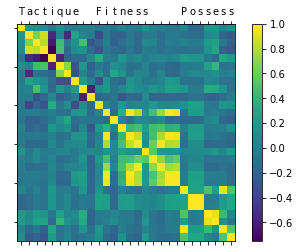

In [66]:
from matplotlib import ticker

from matplotlib import ticker

alpha = [" "] + [a for a in "Tactique  "] + [a for a in "Fitness    "] + [a for a in "Possess"]
beta = [" " for a in alpha]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(shots3.iloc[:,8:].corr(), interpolation='nearest')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

fig.colorbar(cax)

ax.set_xticklabels(alpha)
ax.set_yticklabels(beta)

plt.show()

In [7]:
shots3.goal.mean()

0.17647058823529413

In [8]:
shots3.goal.count()

68

In [13]:
pd.crosstab(shots3.ht,shots3.goal)

goal  False  True 
ht                
1        27      3
2        29      9